# Setup

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import datetime

% matplotlib inline

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced (1).csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
tweets_list = []
tweets_not_found = []
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 729
Rate limit reached. Sleeping for: 733


In [7]:
print("The tweets:" ,len(tweets_list))
print("The tweets not found:" , len(tweets_not_found))

The tweets: 2328
The tweets not found: 28


In [8]:
list_of_dicts = []
for each_json_tweet in tweets_list:
    list_of_dicts.append(each_json_tweet)

In [9]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [10]:
tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

# Data Assessment

In [40]:
tweet_json['tweet_id'] = df_twitter_archive['tweet_id'].astype(int)

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
tweet_id            2147 non-null float64
favorite_count      2328 non-null int64
retweet_count       2328 non-null int64
followers_count     2328 non-null int64
friends_count       2328 non-null int64
source              2328 non-null object
retweeted_status    2328 non-null object
url                 2328 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 145.6+ KB


In [12]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34661,7236,9004594,19,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30033,5419,9004594,19,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22612,3580,9004594,19,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37933,7444,9004594,19,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36208,7991,9004594,19,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18263,2683,9004594,19,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10636,1726,9004594,19,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,58356,16274,9004594,19,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25142,3725,9004594,19,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,28667,6289,9004594,19,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [15]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_twitter_archive["rating_denominator"] = 10

In [17]:
df_twitter_archive = df_twitter_archive[df_twitter_archive.retweeted_status_id.isnull()]
df_twitter_archive = df_twitter_archive[df_twitter_archive.retweeted_status_user_id.isnull()]
df_twitter_archive = df_twitter_archive[df_twitter_archive.retweeted_status_timestamp.isnull()]

In [18]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [24]:
#Are there dogs with ratings above 20?
df_twitter_archive[df_twitter_archive.rating_numerator > 20].shape

(23, 17)

In [25]:
#How many ratings are not for dogs?
df_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

# Clean Data

In [88]:
df_archive_clean = df_twitter_archive.copy()
df_image_clean = df_image_predictions.copy()
df_tweet_clean = tweet_json.copy()

In [89]:
dog_category = ['p1_dog', 'p2_dog', 'p3_dog']
for p in dog_category:
 df_image_clean[p] = df_image_clean[p].astype(int)

df_image_clean['category'] = df_image_clean.p1_dog + df_image_clean.p2_dog + df_image_clean.p3_dog
df_image_clean['category'] = df_image_clean['category'].replace(3, 'Dog')
df_image_clean['category'] = df_image_clean['category'].replace(2, 'Maybe Dog')
df_image_clean['category'] = df_image_clean['category'].replace(1, 'Maybe Dog')
df_image_clean['category'] = df_image_clean['category'].replace(0, 'Not Dog')

df_image_clean.category.value_counts()

Dog          1243
Maybe Dog     508
Not Dog       324
Name: category, dtype: int64

In [90]:
Not_dog_index=df_image_clean.query('category!="Dog"').index
df_image_clean.drop(Not_dog_index, inplace=True)
df_image_clean.drop(['category','p1_conf','p2_conf','p3_conf','p1_dog', 'p2_dog', 'p3_dog', 'img_num'], axis=1, inplace=True)
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
p1          1243 non-null object
p2          1243 non-null object
p3          1243 non-null object
dtypes: int64(1), object(4)
memory usage: 58.3+ KB


In [91]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [92]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index, inplace=True)
df_archive_clean.drop(['retweeted_status_id',
 'retweeted_status_user_id',
'retweeted_status_timestamp',
'in_reply_to_status_id',
'in_reply_to_user_id'], axis=1, inplace=True)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [93]:
df_twitter_archive_master = pd.merge(df_archive_clean, df_tweet_clean, on='tweet_id', how = 'inner')
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 19 columns):
tweet_id              1402 non-null int64
timestamp             1402 non-null object
source_x              1402 non-null object
text                  1402 non-null object
expanded_urls         1366 non-null object
rating_numerator      1402 non-null int64
rating_denominator    1402 non-null int64
name                  1402 non-null object
doggo                 1402 non-null object
floofer               1402 non-null object
pupper                1402 non-null object
puppo                 1402 non-null object
favorite_count        1402 non-null int64
retweet_count         1402 non-null int64
followers_count       1402 non-null int64
friends_count         1402 non-null int64
source_y              1402 non-null object
retweeted_status      1402 non-null object
url                   1402 non-null object
dtypes: int64(7), object(12)
memory usage: 219.1+ KB


In [94]:
df_twitter_archive_master.drop(['rating_denominator'], axis=1, inplace=True)
df_twitter_archive_master.rename(columns={'rating_numerator': 'rating'}, inplace=True)
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 18 columns):
tweet_id            1402 non-null int64
timestamp           1402 non-null object
source_x            1402 non-null object
text                1402 non-null object
expanded_urls       1366 non-null object
rating              1402 non-null int64
name                1402 non-null object
doggo               1402 non-null object
floofer             1402 non-null object
pupper              1402 non-null object
puppo               1402 non-null object
favorite_count      1402 non-null int64
retweet_count       1402 non-null int64
followers_count     1402 non-null int64
friends_count       1402 non-null int64
source_y            1402 non-null object
retweeted_status    1402 non-null object
url                 1402 non-null object
dtypes: int64(6), object(12)
memory usage: 208.1+ KB


In [70]:
df_twitter_archive_master = pd.merge(df_twitter_archive_master, df_image_clean, on='tweet_id')
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 787
Data columns (total 49 columns):
tweet_id            788 non-null int64
timestamp           788 non-null object
source_x            788 non-null object
text                788 non-null object
expanded_urls       788 non-null object
rating              788 non-null int64
name                788 non-null object
doggo               788 non-null object
floofer             788 non-null object
pupper              788 non-null object
puppo               788 non-null object
favorite_count      788 non-null int64
retweet_count       788 non-null int64
followers_count     788 non-null int64
friends_count       788 non-null int64
source_y            788 non-null object
retweeted_status    788 non-null object
url                 788 non-null object
jpg_url_x           788 non-null object
img_num_x           788 non-null int64
p1_x                788 non-null object
p1_conf_x           788 non-null float64
p1_dog_x            7

In [95]:
df_twitter_archive_master['name'].str.lower()

0           archie
1            darla
2         franklin
3             none
4             none
5             zoey
6             koda
7              ted
8           oliver
9              jim
10         ralphus
11          gerald
12         jeffrey
13            such
14            none
15            none
16            maya
17          mingus
18           derek
19          roscoe
20            none
21           jimbo
22          maisey
23            none
24           kevin
25            none
26            none
27           bella
28            none
29           rusty
           ...    
1372          none
1373     genevieve
1374          none
1375          none
1376             a
1377          none
1378      clarence
1379       kenneth
1380          none
1381          gabe
1382          dave
1383          none
1384          none
1385        klevin
1386         carll
1387          none
1388          none
1389          jeph
1390       jockson
1391          none
1392             a
1393        

In [96]:
df_twitter_archive_master.sample(4)

,tweet_id,timestamp,source_x,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
478,752660715232722944,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,https://twitter.com/dog_rates/status/752660715...,10,None,doggo,None,None,None,2086,506,9004609,19,TweetDeck,Original tweet,https://t.co/7tlZPrePXd
701,708469915515297792,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,https://twitter.com/dog_rates/status/708469915...,11,Bobble,None,None,None,None,2199,561,9004613,19,Twitter for iPhone,Original tweet,https://t.co/15yCmd43zU
185,826848821049180160,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,Cupid,doggo,None,None,None,11455,10164,9004598,19,Twitter for iPhone,Original tweet,https://t.co/wBmc7OaGvS
1109,674468880899788800,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,https://twitter.com/dog_rates/status/674468880...,13,Louis,None,None,None,None,1442,581,9004631,19,Twitter for iPhone,Original tweet,https://t.co/Ac37LOe3xD


In [98]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 18 columns):
tweet_id            1402 non-null int64
timestamp           1402 non-null object
source_x            1402 non-null object
text                1402 non-null object
expanded_urls       1366 non-null object
rating              1402 non-null int64
name                1402 non-null object
doggo               1402 non-null object
floofer             1402 non-null object
pupper              1402 non-null object
puppo               1402 non-null object
favorite_count      1402 non-null int64
retweet_count       1402 non-null int64
followers_count     1402 non-null int64
friends_count       1402 non-null int64
source_y            1402 non-null object
retweeted_status    1402 non-null object
url                 1402 non-null object
dtypes: int64(6), object(12)
memory usage: 208.1+ KB


In [99]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Visualization

In [101]:
#most favorited dog
df_twitter_archive_master.sort_values(by=['favorite_count'], ascending=False).head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
190,825147591692263424,2017-01-28 01:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sweet Pea. She hides in shoe boxes and...,https://twitter.com/dog_rates/status/825147591...,13,Sweet,None,None,None,None,127399,41274,9004598,19,Twitter for iPhone,Original tweet,https://t.co/nTz3FtorBc
248,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,Sam,None,None,None,None,114965,53384,9004598,19,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
40,879492040517615616,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,https://twitter.com/dog_rates/status/879492040...,12,Bailey,None,None,None,None,95285,38570,9004594,19,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY
87,860524505164394496,2017-05-05 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,Carl,None,None,None,None,82778,27107,9004595,19,Twitter for iPhone,Original tweet,https://t.co/r6huxnDPOZ
993,679527802031484928,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,https://twitter.com/dog_rates/status/679527802...,11,None,None,None,pupper,None,75597,29567,9004613,19,Twitter for iPhone,Original tweet,https://t.co/VRTbo3aAcm


In [103]:
#Most favorited dog is Sweet Pea, she likes to hide in shoe boxes

In [114]:
#What is the most popular source?
df_twitter_archive_master.source_y.value_counts()

Twitter for iPhone     1314
Vine - Make a Scene      58
Twitter Web Client       23
TweetDeck                 7
Name: source_y, dtype: int64

In [121]:
#What are the top dog names?
df_twitter_archive_master.name.value_counts()

None        449
a            33
Oliver        8
Winston       7
Tucker        7
Lucy          7
Lola          6
Cooper        6
Penny         6
Sadie         5
Bailey        5
Bella         5
Toby          5
Sophie        4
Dexter        4
Sammy         4
Clarence      4
Clark         4
Riley         3
Charlie       3
Shadow        3
Duke          3
Louis         3
Carl          3
the           3
Chip          3
Cassie        3
Milo          3
Leo           3
Scout         3
           ... 
Bradley       1
Skye          1
Nugget        1
Flurpson      1
Zuzu          1
Mingus        1
Darby         1
Aiden         1
Mona          1
Bell          1
Diogi         1
Dug           1
Stubert       1
Reggie        1
Hurley        1
Anakin        1
Jangle        1
Superpup      1
Milky         1
Kaia          1
Aubie         1
Sunny         1
Reese         1
Brooks        1
Pablo         1
Georgie       1
Clyde         1
Carbon        1
Marlee        1
Bloo          1
Name: name, Length: 687,

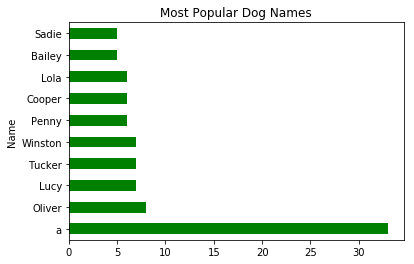

In [125]:
#Bar graph showing top dog names

top_names = df_twitter_archive_master.name.value_counts()[1:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh', color='green')
plt.title('Most Popular Dog Names')
plt.ylabel('Name')
plt.savefig('popular-dog-names.png');
